In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, KBinsDiscretizer, MinMaxScaler
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(10886, 12)

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

### Create a simple dataframe only storing the number of bikes rented

Sums of bikes rented will be easier to calculate if we drop all weather data

In [5]:
df_simple = df.drop(columns=['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed'])

In [6]:
df_simple_reindexed = df_simple.set_index(pd.to_datetime(df['datetime']))

### Analyse yearly data

In [7]:
df_yearly = df_simple_reindexed.resample('1Y').sum()

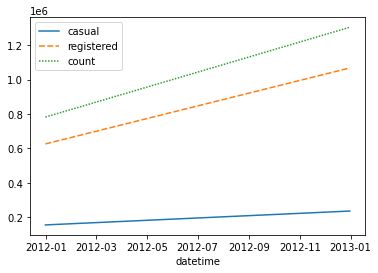

In [8]:
sns.lineplot(data=df_yearly)
plt.show()

The service looks to be becoming more successful in 2012 than it was in 2011. It is likely extracting 'year' from the date will help us increase the model

### Analysing weekly data

In [9]:
df_weekly = df_simple_reindexed.resample('7D').sum()
df_weekly[0:30]

,casual,registered,count
datetime,,,
2011-01-01,1008,8405,9413
2011-01-08,323,8031,8354
2011-01-15,677,5108,5785
2011-01-22,0,0,0
2011-01-29,268,5876,6144
2011-02-05,887,9872,10759
2011-02-12,2089,12217,14306
2011-02-19,532,1103,1635
2011-02-26,705,6909,7614


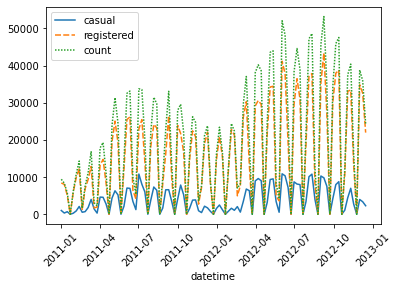

In [10]:
sns.lineplot(data=df_weekly)

plt.xticks(rotation=45)
plt.show()

### Analysing monthly data

In [11]:
df_monthly = df_simple_reindexed.resample('M').sum()

#df_monthly = df_simple
#df_monthly

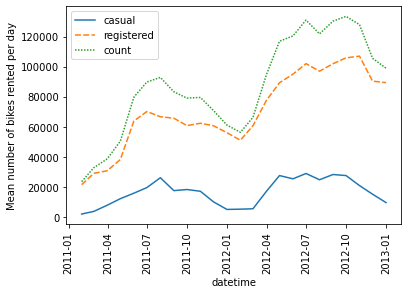

In [12]:
sns.lineplot(data=df_monthly)
plt.ylabel('Mean number of bikes rented per day')
plt.xticks(rotation=90);

There is a high variability in the number of bikes rented depending on the month. Understandably, winter months see reduce useage

### Analysing hourly data

In [13]:
df_by_time = df_simple

In [14]:
df_simple

,datetime,casual,registered,count
0,2011-01-01 00:00:00,3,13,16
1,2011-01-01 01:00:00,8,32,40
2,2011-01-01 02:00:00,5,27,32
3,2011-01-01 03:00:00,3,10,13
4,2011-01-01 04:00:00,0,1,1
...,...,...,...,...
10881,2012-12-19 19:00:00,7,329,336
10882,2012-12-19 20:00:00,10,231,241
10883,2012-12-19 21:00:00,4,164,168
10884,2012-12-19 22:00:00,12,117,129


In [15]:
df_by_time['time'] = df_by_time['datetime'].dt.time

In [16]:
df_by_time = df_by_time.drop(columns=['datetime'])

In [17]:
df_by_time['time'] = df_by_time['time'].astype('str')

In [18]:
df_by_time.set_index(df_by_time['time'], inplace=True)

In [19]:
df_by_time.head()

,casual,registered,count,time
time,,,,
00:00:00,3,13,16,00:00:00
01:00:00,8,32,40,01:00:00
02:00:00,5,27,32,02:00:00
03:00:00,3,10,13,03:00:00
04:00:00,0,1,1,04:00:00


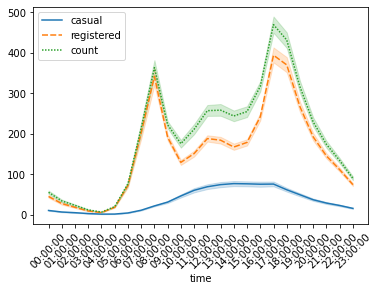

In [20]:
sns.lineplot(data=df_by_time)
plt.xticks(rotation=45);

In [21]:
df_weekdays = df_simple

In [22]:
df_simple

,datetime,casual,registered,count,time
0,2011-01-01 00:00:00,3,13,16,00:00:00
1,2011-01-01 01:00:00,8,32,40,01:00:00
2,2011-01-01 02:00:00,5,27,32,02:00:00
3,2011-01-01 03:00:00,3,10,13,03:00:00
4,2011-01-01 04:00:00,0,1,1,04:00:00
...,...,...,...,...,...
10881,2012-12-19 19:00:00,7,329,336,19:00:00
10882,2012-12-19 20:00:00,10,231,241,20:00:00
10883,2012-12-19 21:00:00,4,164,168,21:00:00
10884,2012-12-19 22:00:00,12,117,129,22:00:00


In [23]:
df_weekdays['day_name'] = df_weekdays['datetime'].dt.day_name()

In [24]:
df_weekdays.set_index(df_weekdays['day_name'], inplace=True)

In [25]:
df_weekdays = df_weekdays.drop(columns=['time', 'datetime', 'day_name'])

In [26]:
df_weekdays.head()

,casual,registered,count
day_name,,,
Saturday,3,13,16
Saturday,8,32,40
Saturday,5,27,32
Saturday,3,10,13
Saturday,0,1,1


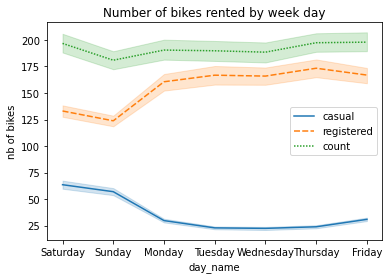

In [27]:
sns.lineplot(data=df_weekdays)
plt.xlabel('day_name')
plt.ylabel('nb of bikes')
plt.title('Number of bikes rented by week day');

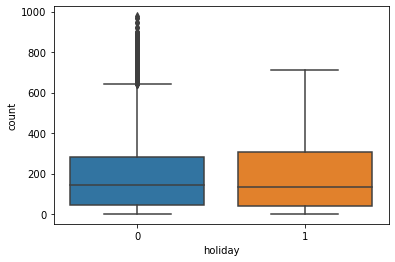

In [28]:
sns.boxplot(x='holiday', y='count', data=df);

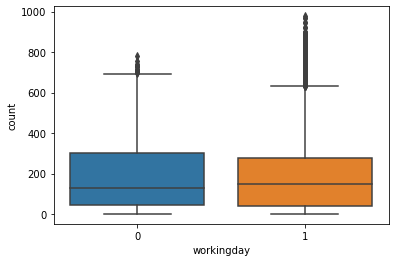

In [29]:
sns.boxplot(x='workingday', y='count', data=df);

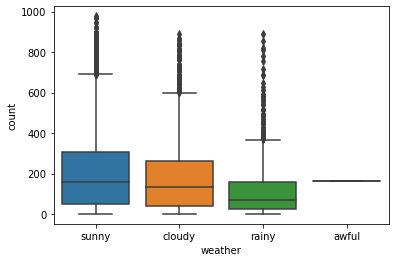

In [30]:
sns.boxplot(x='weather', y='count', data=df)
plt.xticks([0,1,2,3], ['sunny', 'cloudy', 'rainy', 'awful']);

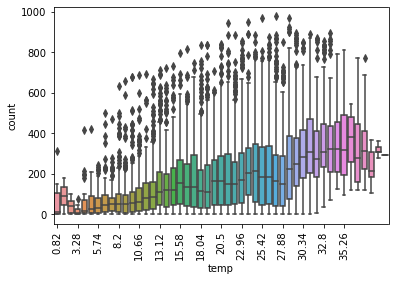

In [31]:
sns.boxplot(x='temp', y='count', data=df)
plt.xticks(np.arange(0, 45, step=3), rotation=90);
#xticks(np.arange(0, 45, step=3))

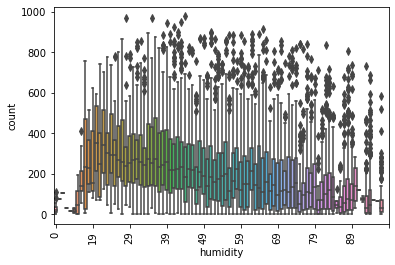

In [32]:
sns.boxplot(x='humidity', y='count', data=df)
plt.xticks(np.arange(0, 100, step=10), rotation=90);

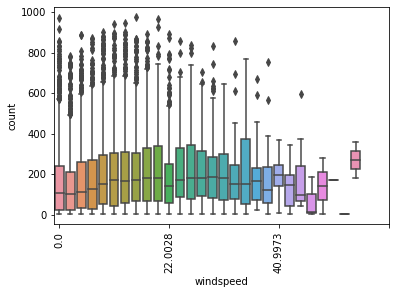

In [33]:
sns.boxplot(x='windspeed', y='count', data=df)
plt.xticks(np.arange(0, 40, 10), rotation=90);

### Linear regression

In [34]:
df = pd.read_csv('train.csv')
#df['datetime'] = pd.to_datetime(df['datetime'])
#df.set_index(df['datetime'], inplace=True)

In [35]:
df1 = df

In [36]:
df_test = pd.read_csv('test.csv')
#df_test = df_test.set_index('datetime')
#datetime_data = df_test.index
#df_test.reset_index(inplace=True)
#df_test.head()
datetime_data = df_test['datetime']


In [37]:
X = df.drop(columns=['count','registered','casual'])
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8164, 9), (2722, 9), (8164,), (2722,))

In [38]:
def clean_dataframe(dataframe):
    dataframe['datetime'] = pd.to_datetime(dataframe['datetime'])
    dataframe['date'] = dataframe['datetime'].dt.date
    dataframe['time'] = dataframe['datetime'].dt.hour
    dataframe['year'] = dataframe['datetime'].dt.year
    dataframe['month'] = dataframe['datetime'].dt.month
    dataframe.set_index(dataframe['datetime'])
    dataframe = dataframe.drop(columns = ['season','atemp','datetime','date','holiday', 'workingday'], inplace=True)
    
    return dataframe

In [39]:
clean_dataframe(X_train)
clean_dataframe(X_test)
clean_dataframe(df_test)

In [40]:
clean_dataframe(df1)

In [41]:
#df1.drop(columns=['registered', 'casual'], inplace=True)
#sns.pairplot(df1)

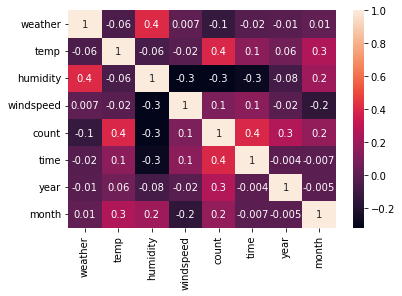

In [42]:
df1_corr = df1.drop(columns=["casual","registered"])
corrMatrix = df1_corr.corr()
sns.heatmap(corrMatrix, annot=True, fmt='.0g')
plt.show()

In [43]:
#sns.pairplot(data=X_train)

In [44]:
pipeline_hour = Pipeline([
    ('poly', PolynomialFeatures(degree=8)),
])

In [45]:
pipeline_encode = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown='ignore', sparse=False, drop='if_binary')),
])

In [46]:
pipeline_weather = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ("binning", StandardScaler()),
])

In [47]:
transformer = ColumnTransformer(
    [
        ("hour", pipeline_hour, ['time']),
        ("encode", pipeline_encode, ['time','weather','year', 'month']),
        ("weather", pipeline_weather, ['windspeed', 'humidity', 'temp']),
    ], remainder='passthrough'
)

In [48]:
pipeline = Pipeline([
    ('preprocessor', transformer),
    ('model', LinearRegression(positive=True))
])

In [49]:
y_train_log = np.log1p(y_train)

In [50]:
X_train.shape, X_test.shape, y_train_log.shape, y_test.shape

((8164, 7), (2722, 7), (8164,), (2722,))

In [51]:
pipeline.fit(X_train, y_train_log)

#generating and unlogging predictions for test
ypred_log_test = pipeline.predict(X_test)
ypred_test = np.exp(ypred_log_test)-1

In [52]:
#generating and unlogging predictions for train
ypred_log_train = pipeline.predict(X_train)
ypred_train = np.exp(ypred_log_train)-1

#generating and unlogging predictions for test
ypred_log_test = pipeline.predict(X_test)
ypred_test = np.exp(ypred_log_test)-1

In [53]:
pipeline.score(X_train, y_train_log)


0.8311233164202145

In [54]:
pipeline.score(X_test, np.log(y_test))

0.8228274436925636

### Calculating Root Mean Squared Logarithmic Error

In [55]:
from sklearn.metrics import mean_squared_log_error

round(np.sqrt(mean_squared_log_error(y_train, ypred_train)),5)

0.58504

In [56]:
round(np.sqrt(mean_squared_log_error(y_test, ypred_test)),5)

0.5834

### Applying the algorithm on the kaggle dataset

In [57]:
ypred_actual_test = pipeline.predict(df_test)
# unlogging the values
ypred_actual_test = np.exp(ypred_actual_test)-1

In [58]:
kaggle_df = pd.DataFrame(data=ypred_actual_test, index=datetime_data, columns=['count'])
kaggle_df
kaggle_df.to_csv('kaggle_submission')

In [59]:
"""from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import pandas as pd

bca = datasets.load_breast_cancer()

X = bca.data[:,:2]  # only two features
y = bca.target

svc = svm.SVC()

grid = GridSearchCV(svc,
        param_grid={'C': [1.0, 0.1, 0.01, 0.001], 'kernel':['linear', 'rbf']},
        scoring='accuracy',
        n_jobs=1,
        cv=5,
        return_train_score=True
        )

grid.fit(X, y)
print("all scores      :")
print(pd.DataFrame(grid.cv_results_))

print("\nbest score      :", grid.best_score_)"""

'from sklearn import svm, datasets\nfrom sklearn.model_selection import GridSearchCV\nimport pandas as pd\n\nbca = datasets.load_breast_cancer()\n\nX = bca.data[:,:2]  # only two features\ny = bca.target\n\nsvc = svm.SVC()\n\ngrid = GridSearchCV(svc,\n        param_grid={\'C\': [1.0, 0.1, 0.01, 0.001], \'kernel\':[\'linear\', \'rbf\']},\n        scoring=\'accuracy\',\n        n_jobs=1,\n        cv=5,\n        return_train_score=True\n        )\n\ngrid.fit(X, y)\nprint("all scores      :")\nprint(pd.DataFrame(grid.cv_results_))\n\nprint("\nbest score      :", grid.best_score_)'

### Cross validation

In [60]:
clean_X = X
clean_dataframe(clean_X)

In [61]:
from sklearn.model_selection import cross_validate

cv = cross_validate(pipeline, clean_X, y,
                    cv=5,
                    scoring='r2',
                    return_estimator=True,
                    return_train_score=True
)
# convert the dictionary of lists into a DataFrame
cv = pd.DataFrame(cv)
cv

/Users/em/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,fit_time,score_time,estimator,test_score,train_score
0,0.218688,0.015368,"(ColumnTransformer(remainder='passthrough',\n ...",-0.112914,0.700769
1,0.203752,0.016374,"(ColumnTransformer(remainder='passthrough',\n ...",0.641484,0.644842
2,0.185143,0.017763,"(ColumnTransformer(remainder='passthrough',\n ...",0.562917,0.695492
3,0.207470,0.016601,"(ColumnTransformer(remainder='passthrough',\n ...",0.660645,0.678482
4,0.194431,0.016311,"(ColumnTransformer(remainder='passthrough',\n ...",0.631335,0.692613


### Parameters optimization

In [62]:
from sklearn.model_selection import GridSearchCV

m = LinearRegression()
hyperparam_grid = {
    'fit_intercept' : [True, False],
    'n_jobs': [5,10,20],
    'positive': [True, False]
}

grid_cv = GridSearchCV(estimator = LinearRegression(),
                      param_grid = hyperparam_grid,
                      cv=5,
                      scoring='r2')

In [63]:
results_df = pd.DataFrame(grid_cv.cv_results_).sort_values('rank_test_score')
results_df

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

#### Finding the best model to use

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

classifiers = {
    #"KNN": KNeighborsClassifier(), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "LR": LinearRegression(),
    #"SVM": SVC(),
}
results = pd.DataFrame(columns=["Classifier", "Avg_r2"])

for name, clf in classifiers.items():
    model = clf
    cv_results = cross_validate(
        model, X, y, cv=5,
        scoring=(['r2'])
    )

    results = results.append({
        "Classifier": name,
        "Avg_r2": cv_results['test_r2'].mean(),
    }, ignore_index=True)
    
    print(name + ' is done')
    
results